# 100 Year picontrol to last twenty year difference

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import nc_time_axis
import pandas as pd
import zarr
import gcsfs

In [13]:
from dask.distributed import Client
from dask.distributed import LocalCluster
client = Client(dashboard_address=':8082')
client

/home/tu.temple.edu/tun27673/miniconda3/envs/antarctic_southernocean_2/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8082 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42289 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:42289/status,
Dashboard: http://127.0.0.1:42289/status,Workers: 14
Total threads: 112,Total memory: 755.56 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36605,Workers: 14
Dashboard: http://127.0.0.1:42289/status,Total threads: 112
Started: Just now,Total memory: 755.56 GiB
Comm: tcp://127.0.0.1:34055,Total threads: 8
Dashboard: http://127.0.0.1:44935/status,Memory: 53.97 GiB
Nanny: tcp://127.0.0.1:36293,


In [101]:
# Import surface air temp and static datasets
t_ref = xr.open_mfdataset('/backup/tuq41374/model_output/sofia/antwater/gfdl-cm4/atmos/monthly/t_ref/*.nc', chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)
static = xr.open_dataset('/home/pachamama/shared/model_output/sofia/cm4/static/atmos_level.static.nc' , chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)

In [102]:
static

<xarray.Dataset>
Dimensions:      (scalar_axis: 1, lev: 33, nv: 2, phalf: 34, lat: 180, bnds: 2,
                  lon: 288)
Coordinates:
  * scalar_axis  (scalar_axis) float64 0.0
  * lev          (lev) float64 0.998 0.9928 0.9854 ... 0.01099 0.006093 0.0025
  * nv           (nv) float64 1.0 2.0
  * phalf        (phalf) float64 1.0 4.0 8.186 13.79 ... 981.1 989.7 995.9 1e+03
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * bnds         (bnds) float64 1.0 2.0
Data variables: (12/18)
    p850         (scalar_axis) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    height10m    (scalar_axis) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    height2m     (scalar_axis) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    p500         (scalar_axis) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    p700         (scalar_axis) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    ap           (lev) float64 dask.array<chunksize=(33,), meta=np.ndarray>
    ...           ...
    lat_bnds     (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds     (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
    orog         (lat, lon) float32 dask.array<chunksize=(180, 288), meta=np.ndarray>
    sftlf        (lat, lon) float32 dask.array<chunksize=(180, 288), meta=np.ndarray>
    land_mask    (lat, lon) float32 dask.array<chunksize=(180, 288), meta=np.ndarray>
    zsurf        (lat, lon) float32 dask.array<chunksize=(180, 288), meta=np.ndarray>
Attributes:
    external_variables:  ps ps

In [71]:
airtemp = t_ref.t_ref

In [43]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
523769,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523770,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523771,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523772,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


In [114]:
df_ta = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'tas' & experiment_id == 'piControl'")
df_ta

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
9380,CMIP,NOAA-GFDL,GFDL-CM4,piControl,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/piCon...,NaN,20180701
18371,CMIP,NOAA-GFDL,GFDL-ESM4,piControl,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/piCo...,NaN,20180701
31930,CMIP,CNRM-CERFACS,CNRM-CM6-1,piControl,r1i1p1f2,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/...,NaN,20180814
32235,CMIP,NASA-GISS,GISS-E2-1-G,piControl,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/pi...,NaN,20180824
40425,CMIP,BCC,BCC-CSM2-MR,piControl,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/piContro...,NaN,20181016
...,...,...,...,...,...,...,...,...,...,...,...
518213,CMIP,KIOST,KIOST-ESM,piControl,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/KIOST/KIOST-ESM/piContro...,NaN,20210329
518262,CMIP,EC-Earth-Consortium,EC-Earth3-CC,piControl,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20210330
519896,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,piControl,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20210419
521067,CMIP,EC-Earth-Consortium,EC-Earth3,piControl,r2i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20210601


In [115]:
GFDL = df_ta.query('institution_id == "NOAA-GFDL"')
GFDL 

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
9380,CMIP,NOAA-GFDL,GFDL-CM4,piControl,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/piCon...,NaN,20180701
18371,CMIP,NOAA-GFDL,GFDL-ESM4,piControl,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/piCo...,NaN,20180701


In [117]:
GFDLCM4 = GFDL.query('source_id == "GFDL-CM4"')
GFDLCM4

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
9380,CMIP,NOAA-GFDL,GFDL-CM4,piControl,r1i1p1f1,Amon,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/piCon...,NaN,20180701


In [118]:
gcs = gcsfs.GCSFileSystem(token='anon')

zstore = GFDLCM4.zstore.values[-1]

mapper = gcs.get_mapper(zstore)

ds = xr.open_zarr(mapper, consolidated=True)
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 6000)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 ...
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 0151-01-16 12:00:00 ... 0650-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(6000, 2), meta=np.ndarray>
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 180, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  54750.0
    comment:                <null ref>
    ...                     ...
    variable_id:            tas
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-08-08;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/7ba3c844-8001-404b-b3df-7e5b680b4000...
    version_id:             v20180701

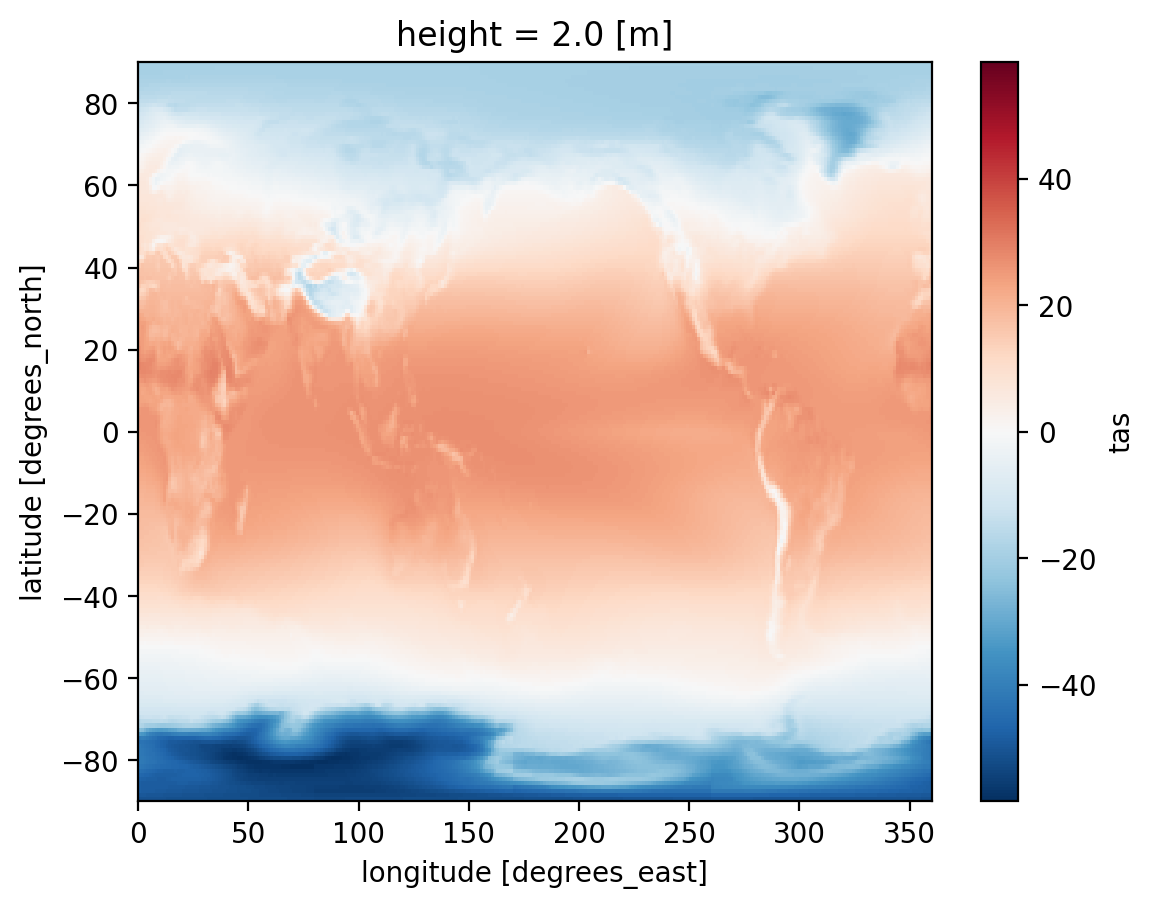

In [119]:
picontrol = ds.tas.sel(time=slice("0251-01-16", "0350-12-16")).mean(dim="time") - 273.15
picontrol.plot()

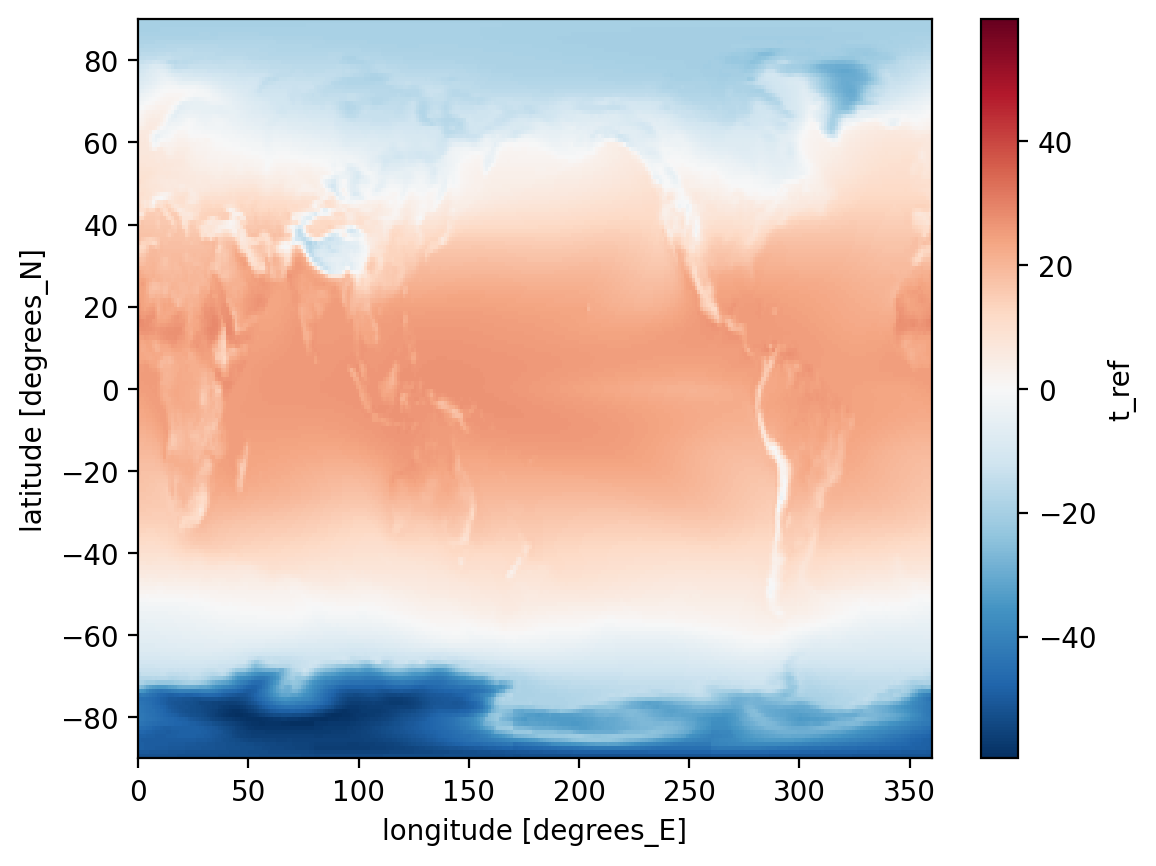

In [134]:
lasttwenty = airtemp.sel(time=slice("0080-07-02", "0100-07-02")).mean(dim="time") -273.15
lasttwenty.plot()

Text(0.5, 1.0, '100 Year Pre-Industrial Control Average')

<Figure size 1200x800 with 0 Axes>

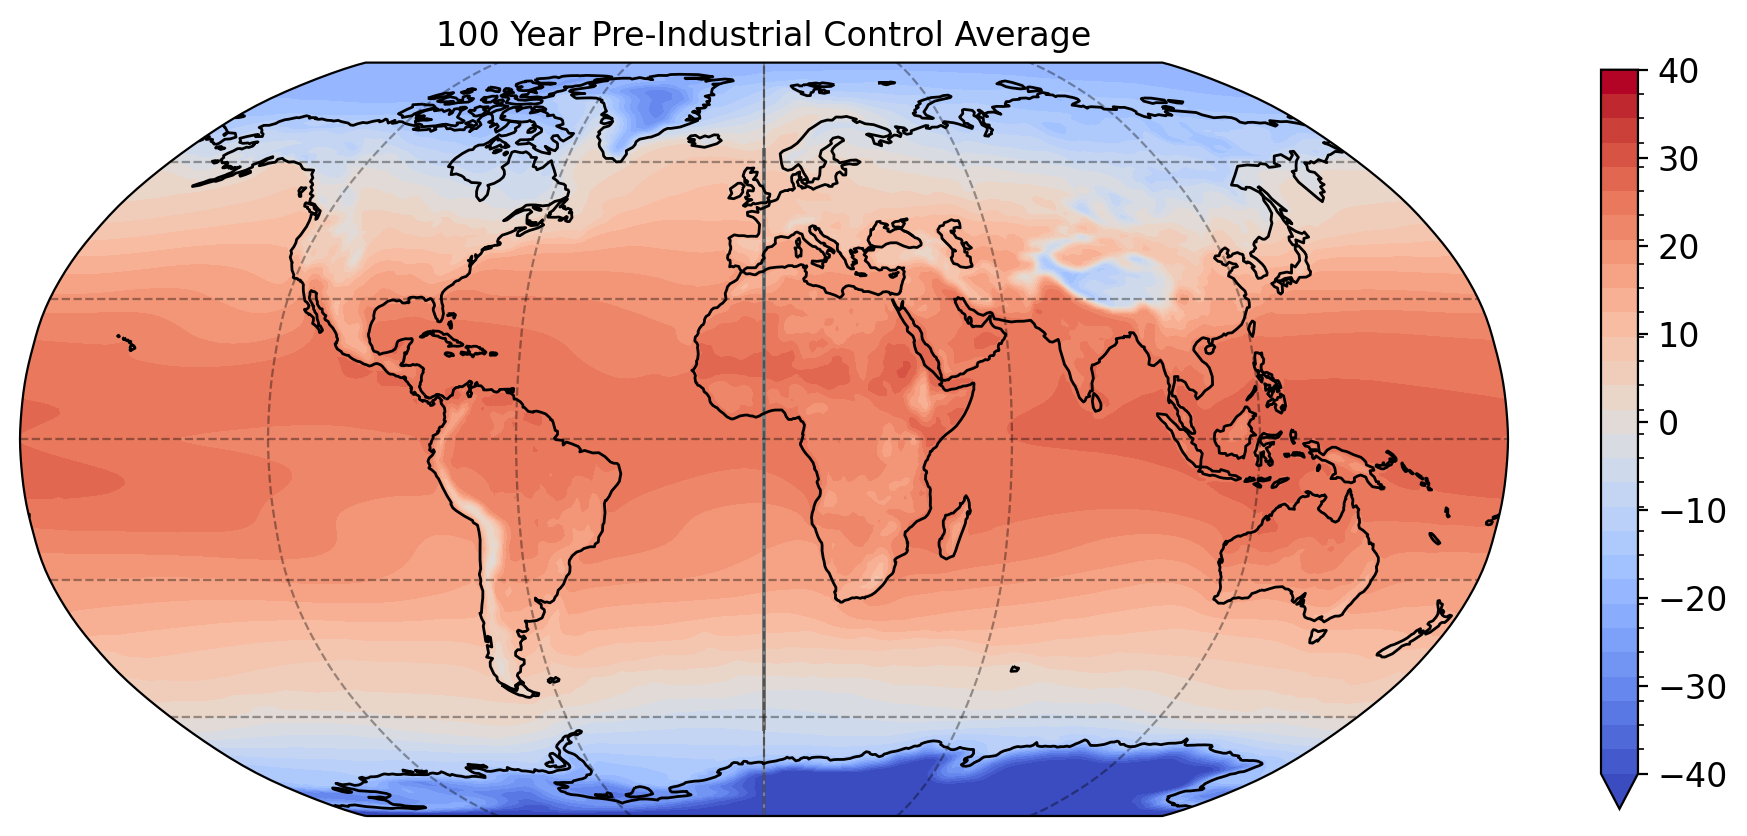

In [121]:
subplot_kws=dict(projection=ccrs.Robinson(),
                 )

plt.figure(figsize=[12,8])

subplot_kws=dict(projection=ccrs.Robinson(),
                 facecolor='gray')

plt.figure(figsize=[12,8])
p = picontrol.plot.contourf(x='lon', y='lat',
                        vmin=-40,vmax=40,
                      cmap='coolwarm',
                      subplot_kws=subplot_kws,
                      transform=ccrs.PlateCarree(),
                      add_colorbar=False, levels= 30)

p.axes.gridlines(color='black', alpha=0.2, linestyle='--')
p.axes.gridlines(color='black', alpha=0.2, linestyle='--')
p.axes.coastlines()


# add a seperate colorbar
cb = plt.colorbar(p, ticks=[-40, -30, -20, -10, 0, 10, 20, 30, 40],shrink=0.6,extend='both')
cb.ax.tick_params(labelsize=12)
plt.title("100 Year Pre-Industrial Control Average")

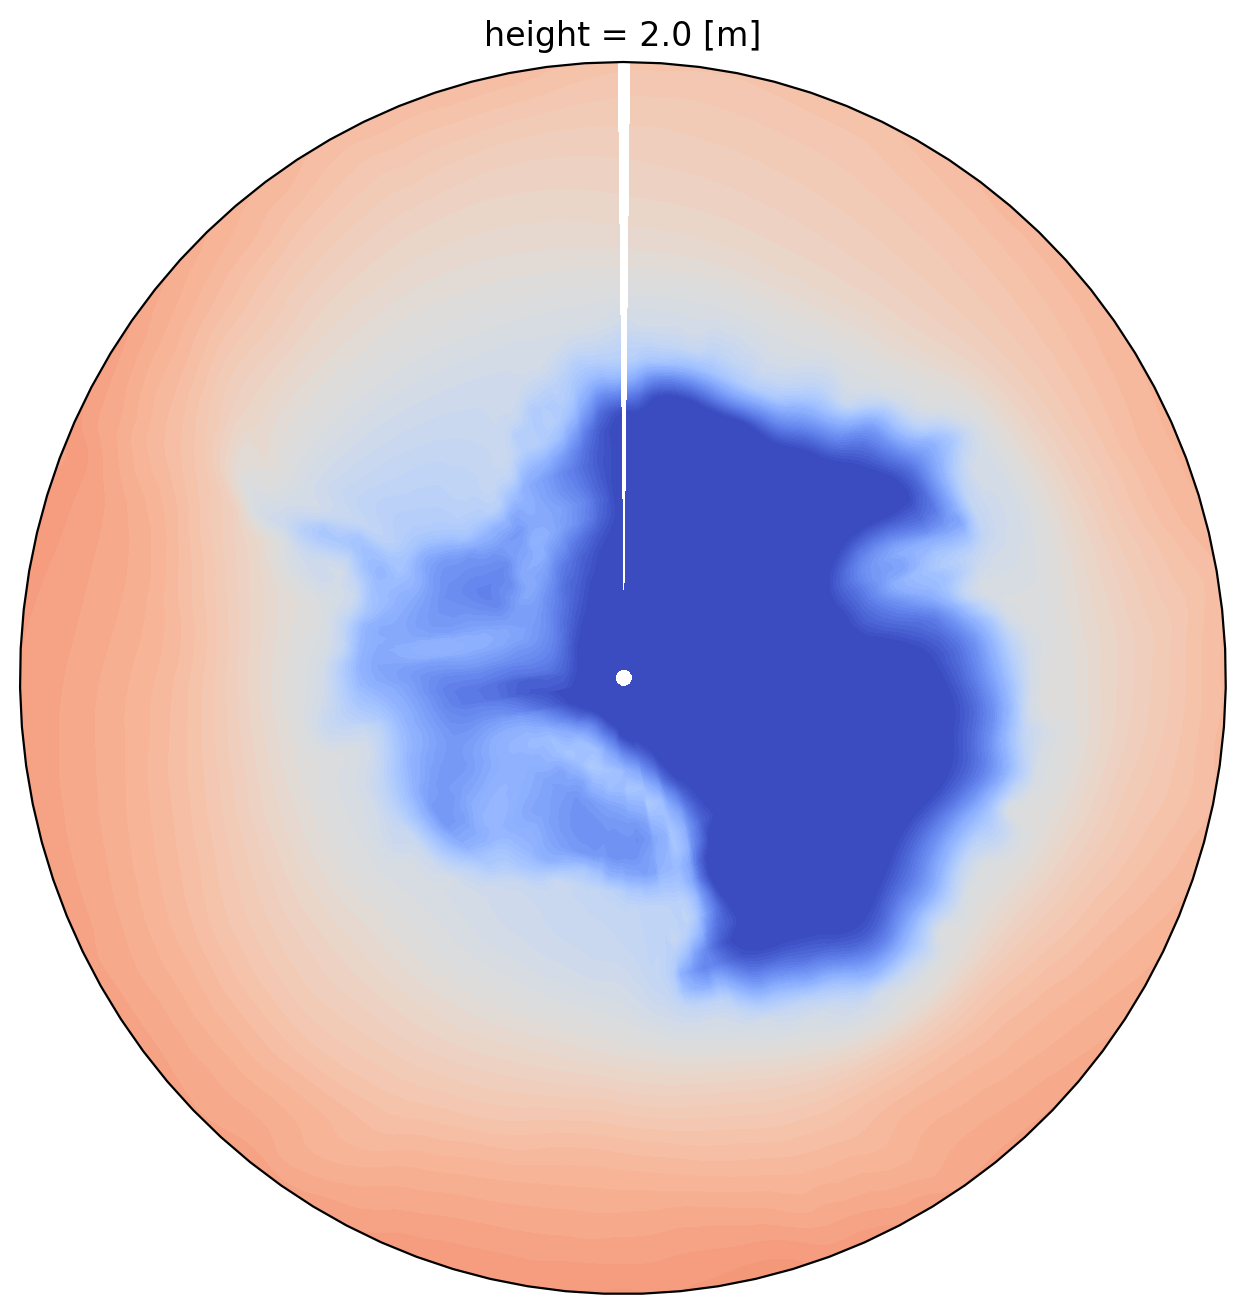

In [124]:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

plt.figure(figsize=[12,8])

projection=ccrs.SouthPolarStereo()
ax = plt.axes(projection=projection)
ax.set_extent([-180,180,-90,-55], ccrs.PlateCarree())
ax.set_boundary(circle,transform=ax.transAxes)
p.axes.coastlines()

p = picontrol.plot.contourf(x='lon', y='lat',
                        vmin=-40,vmax=20,
                        cmap='coolwarm',
                        transform=ccrs.PlateCarree(),add_colorbar=False, levels= 65)

#cb = plt.colorbar(p, ticks=[-3,-2,-1,0,1,2,3],extend='both')


In [135]:
diff = lasttwenty - picontrol
diff

<xarray.DataArray (lat: 180, lon: 288)>
dask.array<sub, shape=(180, 288), dtype=float32, chunksize=(180, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    height   float64 ...

Text(0.5, 1.0, '100yr PI to Last Twenty yr Difference')

<Figure size 1200x800 with 0 Axes>

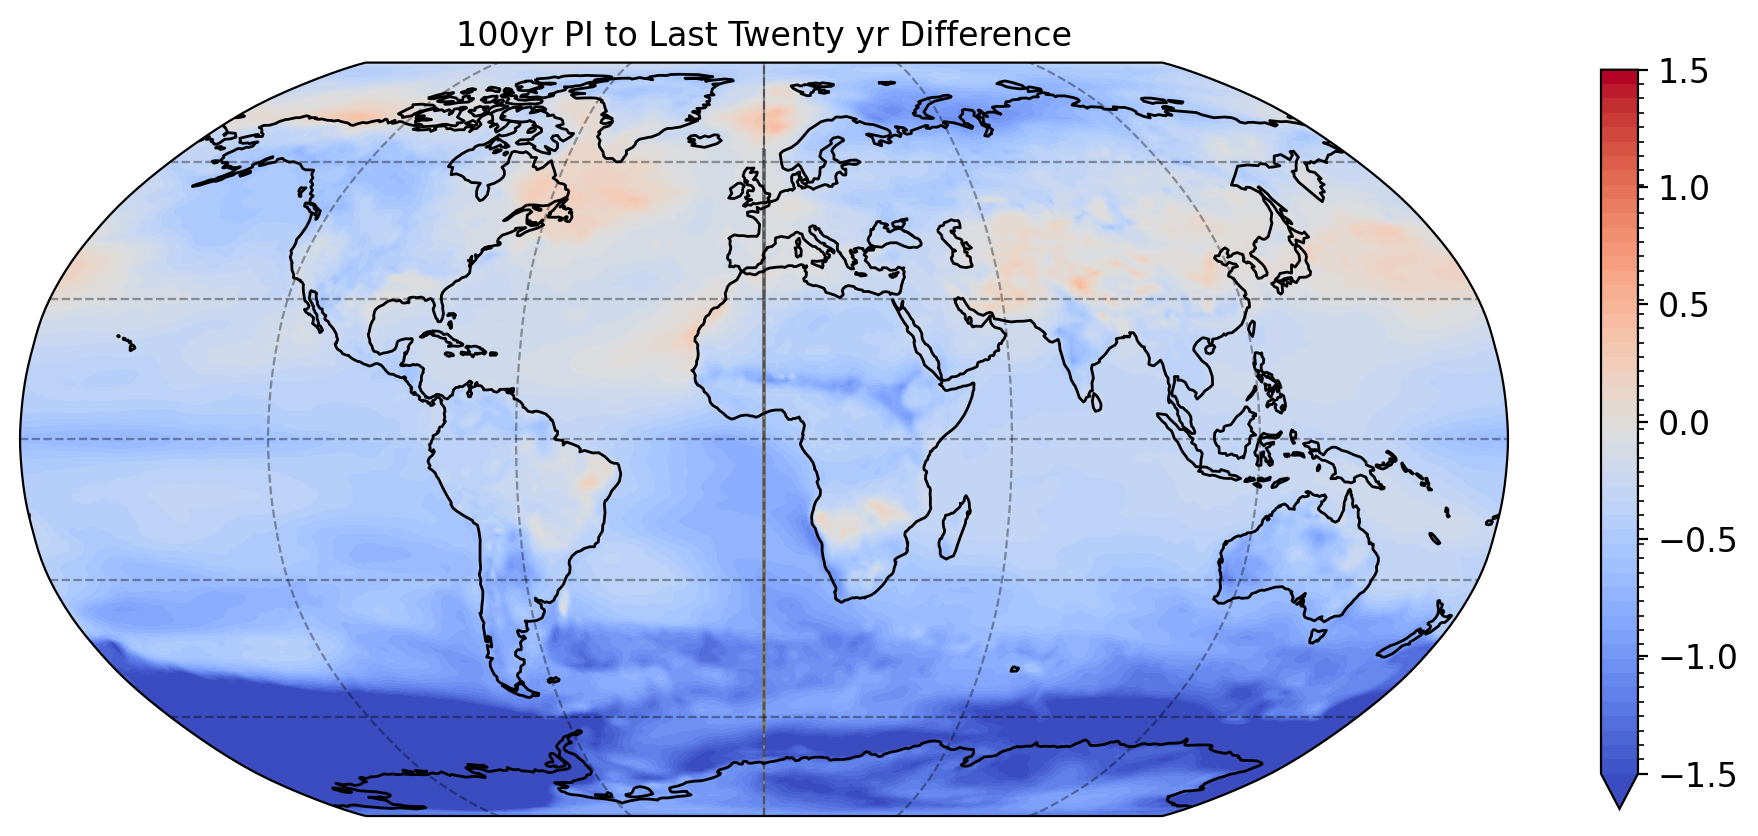

In [152]:
subplot_kws=dict(projection=ccrs.Robinson(),
                 )

plt.figure(figsize=[12,8])

subplot_kws=dict(projection=ccrs.Robinson(),
                 facecolor='gray')

plt.figure(figsize=[12,8])
p = diff.plot.contourf(x='lon', y='lat',
                        vmin=-1.5, vmax=1.5,
                      cmap='coolwarm',
                      subplot_kws=subplot_kws,
                      transform=ccrs.PlateCarree(),
                      add_colorbar=False, levels= 50)

p.axes.gridlines(color='black', alpha=0.2, linestyle='--')
p.axes.gridlines(color='black', alpha=0.2, linestyle='--')
p.axes.coastlines()


# add a seperate colorbar
cb = plt.colorbar(p, ticks=[-1.5, -1, -.5, 0, .5, 1, 1.5],shrink=0.6,extend='both')
cb.ax.tick_params(labelsize=12)
plt.title("100yr PI to Last Twenty yr Difference")

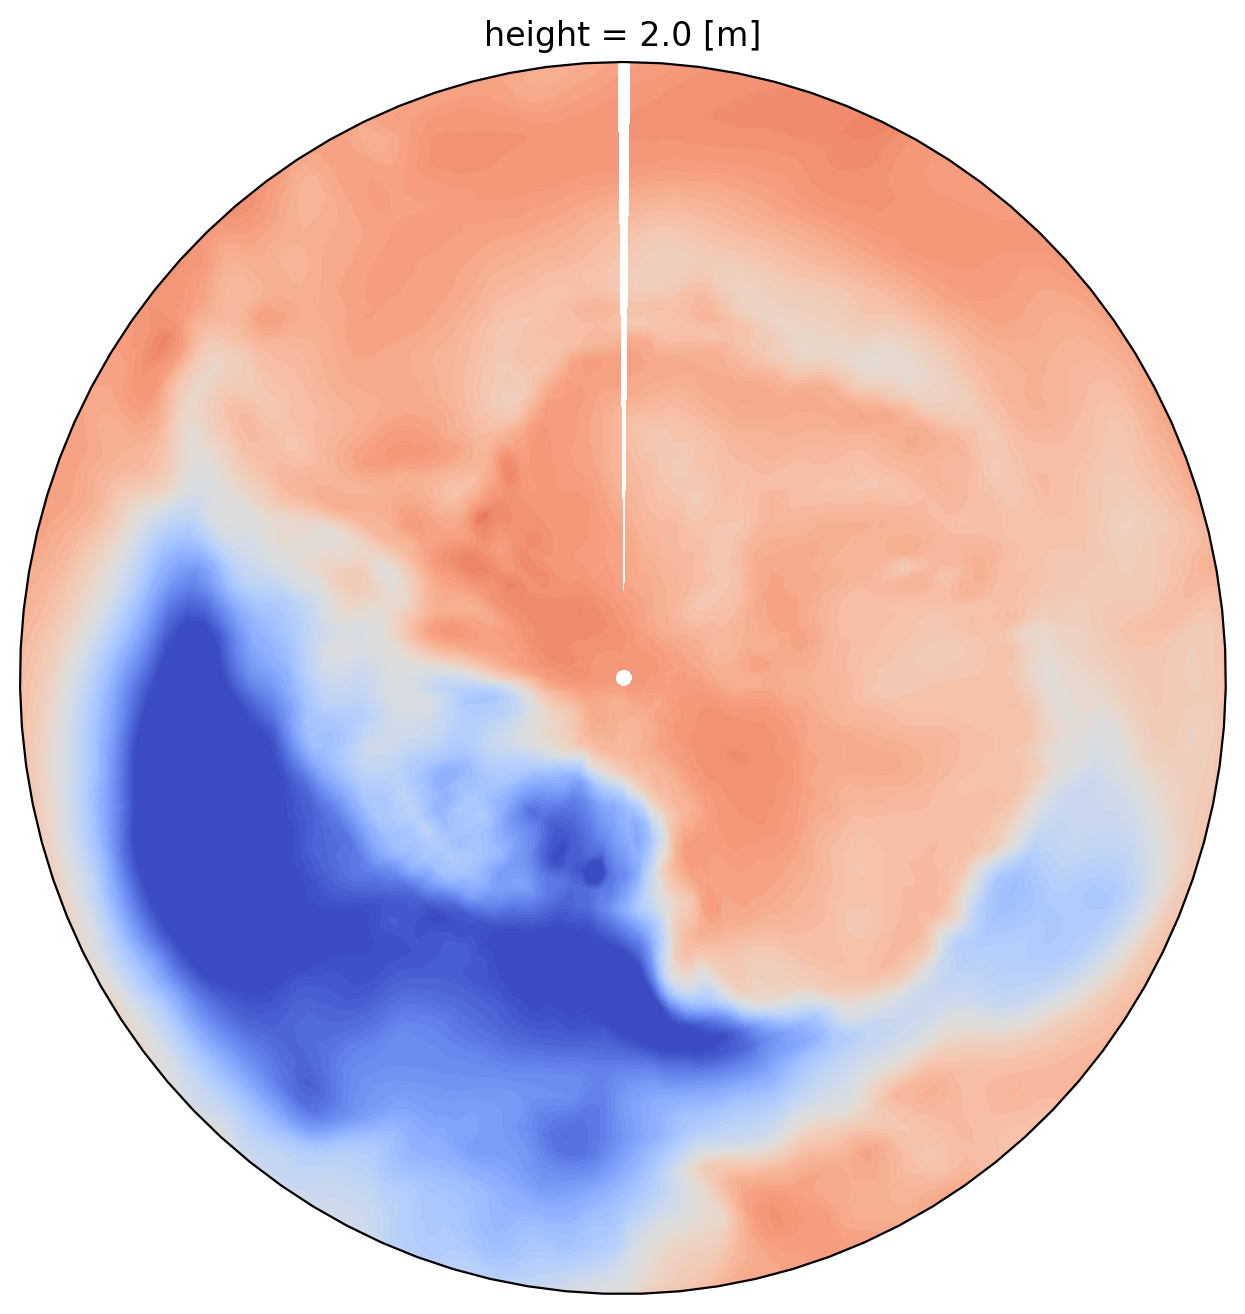

In [150]:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

plt.figure(figsize=[12,8])

projection=ccrs.SouthPolarStereo()
ax = plt.axes(projection=projection)
ax.set_extent([-180,180,-90,-55], ccrs.PlateCarree())
ax.set_boundary(circle,transform=ax.transAxes)
p.axes.coastlines()

p = diff.plot.contourf(x='lon', y='lat',
                        vmin=-4,vmax=0,
                        cmap='coolwarm',
                        transform=ccrs.PlateCarree(),add_colorbar=False, levels= 65)

cb = plt.colorbar(p, ticks=[-3,-2,-1,0,1,2,3],extend='both')